# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Khansa Amani
- **Email:** khansaamani101@gmail.com
- **ID Dicoding:** khansaamani

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan performa rental sepeda pada tahun 2011 dan 2012?
- Bagaimana performa rental sepeda setiap bulannya pada tahun 2011 dan 2012?
- Bagaimana pengaruh working day dan jam terhadap jumlah rental sepeda?
- Bagaimana perbandingan antara casual dan regular users dalam seluruh jumlah rental?

## Import Semua Packages/Library yang Digunakan

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Berikut merupakan constant yang nantinya akan dibutuhkan pada proses analisis data, sehingga diinisiasi terlebih dahulu di awal.

In [121]:
MAX_TEMP_ORI = 41.0
MAX_ATEMP_ORI = 50.0
MAX_HUM_ORI = 100.0
MAX_WINDSPEED_ORI = 67.0

## Data Wrangling

### Gathering Data

Gathering data dilakukan dengan membaca file csv pada folder data, yang kemudian akan diubah menjadi sebuah dataframe `day_df` dan `hour_df`.

In [122]:
day_df = pd.read_csv("data/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dapat dilihat bahwa data pada dataframe `day_df` terdiri dari 16 kolom, dengan keterangan sebagai berikut:
    - `instant`: indeks catatan
    - `dteday`: tahun-bulan-tanggal
    - `season`: musim (1: spring, 2: summer, 3: fall, 4: winter)
    - `yr`: tahun (0: 2011, 1: 2012)
    - `mnth`: bulan (1 - 12 (merepresentasikan January hingga December))
    - `holiday`: hari tersebut termasuk hari libur tertentu/tidak
    - `weekday`: hari (0 - 6 (merepresentasikan Sunday hingga Saturday))
    - `workingday`: 0 jika non-workingday, 1 jika workingday
    - `weathersit`: merepresentasikan cuaca
        - 1: clear
        - 2: mist
        - 3: rain
        - 4: snow
    - `temp`: suhu yang telah dinormalisasi dengan dibagi 41
    - `atemp`: suhu dirasakan yang telah dinormalisasi dengan dibagi 50
    - `hum`: kelembaban yang telah dinormalisasi dengan dibagi 100
    - `windspeed`: kecepatan angin yang telah dinormalisasi dengan dibagi 67
    - `casual`: jumlah pengguna biasa (casual users)
    - `registered`: jumlah pengguna terdaftar (registered users)
    - `cnt`: jumlah total rental sepeda (casual + registered)

In [123]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dapat dilihat bahwa data pada dataframe `hour_df` terdiri dari 16 kolom, dengan keterangan sebagai berikut:
    - `instant`: indeks catatan
    - `dteday`: tahun-bulan-tanggal
    - `season`: musim (1: spring, 2: summer, 3: fall, 4: winter)
    - `yr`: tahun (0: 2011, 1: 2012)
    - `mnth`: bulan (1 - 12 (merepresentasikan January hingga December))
    - `hr`: jam (0 - 23)
    - `holiday`: hari tersebut termasuk hari libur tertentu/tidak
    - `weekday`: hari (0 - 6 (merepresentasikan Sunday hingga Saturday))
    - `workingday`: 0 jika non-workingday, 1 jika workingday
    - `weathersit`: merepresentasikan cuaca
        - 1: clear
        - 2: mist
        - 3: rain
        - 4: snow
    - `temp`: suhu yang telah dinormalisasi dengan dibagi 41
    - `atemp`: suhu dirasakan yang telah dinormalisasi dengan dibagi 50
    - `hum`: kelembaban yang telah dinormalisasi dengan dibagi 100
    - `windspeed`: kecepatan angin yang telah dinormalisasi dengan dibagi 67
    - `casual`: jumlah pengguna biasa (casual users)
    - `registered`: jumlah pengguna terdaftar (registered users)
    - `cnt`: jumlah total rental sepeda (casual + registered)

### Assessing Data

**Menilai tabel day:**

In [124]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [125]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada missing values pada tabel day
- Terdapat data type yang kurang tepat pada kolom dteday. Kolom tersebut seharusnya memiliki tipe data datetime

In [126]:
print("Jumlah duplikasi pada data:", day_df.duplicated().sum())

Jumlah duplikasi pada data: 0


**Insight:**
- Tidak ada duplikasi value pada tabel day

In [127]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Beberapa kolom (temp, atemp, hum, dan windspeed) memiliki value hasil normalisasi, hal ini membuat value kolom tersebut lebih sulit diinterpretasikan
- Beberapa kolom (season, year, month, holiday, weekday, dan workingday) menggunakan value numerik untuk merepresentasikan kategori, hal ini membuat value kolom tersebut lebih sulit diinterpretasikan

**Menilai tabel hour:**

In [128]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [129]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Tidak ada missing values pada tabel hour
- Terdapat data type yang kurang tepat pada kolom dteday. Kolom tersebut seharusnya memiliki tipe data datetime

In [130]:
print("Jumlah duplikasi pada data:", hour_df.duplicated().sum())

Jumlah duplikasi pada data: 0


**Insight:**
- Tidak ada duplikasi value pada tabel hour

In [131]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Beberapa kolom (temp, atemp, hum, dan windspeed) memiliki value hasil normalisasi, hal ini membuat value kolom tersebut lebih sulit diinterpretasikan
- Beberapa kolom (season, holiday, weekday, dan workingday) menggunakan value numerik untuk merepresentasikan kategori, hal ini membuat value kolom tersebut lebih sulit diinterpretasikan

### Cleaning Data

**Membersihkan tabel day:**

In [132]:
datetime_columns_day = ["dteday"]
for column in datetime_columns_day:
    day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data kolom dteday telah berhasil diubah menjadi tipe data datetime

Mengembalikan value kolom yang telah dinormalisasi menjadi value asli agar lebih mudah diinterpretasikan

In [133]:
# kolom temp
day_df["temp"] = day_df["temp"] * MAX_TEMP_ORI

# kolom atemp
day_df["atemp"] = day_df["atemp"] * MAX_ATEMP_ORI

# kolom hum
day_df["hum"] = day_df["hum"] * MAX_HUM_ORI

# kolom windspeed
day_df["windspeed"] = day_df["windspeed"] * MAX_WINDSPEED_ORI

day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Kolom yang menggunakan value numerik untuk merepresentasikan kategori aslinya akan dipertahankan seperti itu untuk saat ini karena value numerik akan dimanfaatkan dalam sorting data selama tahap eksplorasi. Value asli akan ditampilkan saat tahap visualisasi.

**Membersihkan tabel hour:**

In [134]:
datetime_columns_hour = ["dteday"]
for column in datetime_columns_hour:
    hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data kolom dteday telah berhasil diubah menjadi tipe data datetime

Mengembalikan value kolom yang telah dinormalisasi menjadi value asli agar lebih mudah diinterpretasikan

In [135]:
# kolom temp
hour_df["temp"] = hour_df["temp"] * MAX_TEMP_ORI

# kolom atemp
hour_df["atemp"] = hour_df["atemp"] * MAX_ATEMP_ORI

# kolom hum
hour_df["hum"] = hour_df["hum"] * MAX_HUM_ORI

# kolom windspeed
hour_df["windspeed"] = hour_df["windspeed"] * MAX_WINDSPEED_ORI

hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


Kolom yang menggunakan value numerik untuk merepresentasikan kategori aslinya akan dipertahankan seperti itu untuk saat ini karena value numerik akan dimanfaatkan dalam sorting data selama tahap eksplorasi. Value asli akan ditampilkan saat tahap visualisasi.

## Exploratory Data Analysis (EDA)

### Explore Jumlah Rental Sepeda per Tahun

In [136]:
day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


**Insight:**
- Berdasarkan pivot table di atas, dapat dilihat bahwa jumlah rental sepeda pada tahun 2012 lebih tinggi dibanding tahun 2011. 
- Jumlah registered users konsisten selalu lebih tinggi dibanding dengan casual users setiap tahunnya.

### Explore Jumlah Rental Sepeda per Bulan setiap Tahunnya

In [137]:
day_df.groupby(by=["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by=["yr", "mnth"])

casual  registered     cnt
yr mnth                            
0  1       3073       35116   38189
   2       6242       41973   48215
   3      12826       51219   64045
   4      22346       72524   94870
   5      31050      104771  135821
   6      30612      112900  143512
   7      36452      104889  141341
   8      28842      107849  136691
   9      26545      100873  127418
   10     25222       98289  123511
   11     15594       86573  102167
   12      8448       78875   87323
1  1       8969       87775   96744
   2       8721       94416  103137
   3      31618      133257  164875
   4      38456      135768  174224
   5      44235      151630  195865
   6      43294      159536  202830
   7      41705      161902  203607
   8      43197      171306  214503
   9      43778      174795  218573
   10     34538      164303  198841
   11     21009      131655  152664
   12     13245      110468  123713

**Insight:**
- Berdasarkan pivot table di atas, dapat dilihat bahwa pada tahun 2011, jumlah rental sepeda tertinggi adalah 143512, yakni pada bulan June. Sedangkan, jumlah terendah adalah 38189 pada bulan January.
- Jumlah rental sepeda tertinggi pada tahun 2012 adalah 218573 pada bulan September. Sedangkan, jumlah terendah adalah 96744 pada bulan January.

### Explore Pengaruh Working Day dan Jam terhadap Jumlah Rental Sepeda

In [138]:
hour_df.groupby(by=["workingday", "hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
workingday hr                            
0          0     3829       17055   20884
           1     2876       13111   15987
           2     2371        9752   12123
           3     1465        4386    5851
           4      514        1362    1876
           5      383        1546    1929
           6      875        3417    4292
           7     1988        8039   10027
           8     4718       19688   24406
           9    10399       29246   39645
           10   18311       40804   59115
           11   24637       48201   72838
           12   29163       55443   84606
           13   31514       54587   86101
           14   32246       51987   84233
           15   31532       51354   82886
           16   29710       51770   81480
           17   25829       48911   74740
           18   19371       45272   64643
           19   15076       38209   53285
           20   10756       29434   40190
           21    8314       24360   32674
           22    6453       20241   26694
           23    4402       15362   19764
1          0     3546       14700   18246
           1     1833        6344    8177
           2     1041        3188    4229
           3      428        1895    2323
           4      360        2192    2552
           5      629       11703   12332
           6     2142       48698   50840
           7     6049      138095  144144
           8    11043      225552  236595
           9    12059      107734  119793
           10   15478       51664   67142
           11   18649       59833   78482
           12   20555       79253   99808
           13   21199       77619   98818
           14   22843       68576   91419
           15   23074       77189  100263
           16   24124      122144  146268
           17   28391      233729  262120
           18   25125      220004  245129
           19   20429      153075  173504
           20   15622      108738  124360
           21   12256       80515   92771
           22    9747       59171   68918
           23    6663       37514   44177

Agar insight pada data tersebut dapat dilihat dengan lebih mudah, data tersebut dapat kita urutkan berdasarkan jumlah rental sepeda seperti berikut:

In [139]:
hour_df.groupby(by=["workingday", "hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by=["workingday", "cnt"], ascending=False)

casual  registered     cnt
workingday hr                            
1          17   28391      233729  262120
           18   25125      220004  245129
           8    11043      225552  236595
           19   20429      153075  173504
           16   24124      122144  146268
           7     6049      138095  144144
           20   15622      108738  124360
           9    12059      107734  119793
           15   23074       77189  100263
           12   20555       79253   99808
           13   21199       77619   98818
           21   12256       80515   92771
           14   22843       68576   91419
           11   18649       59833   78482
           22    9747       59171   68918
           10   15478       51664   67142
           6     2142       48698   50840
           23    6663       37514   44177
           0     3546       14700   18246
           5      629       11703   12332
           1     1833        6344    8177
           2     1041        3188    4229
           4      360        2192    2552
           3      428        1895    2323
0          13   31514       54587   86101
           12   29163       55443   84606
           14   32246       51987   84233
           15   31532       51354   82886
           16   29710       51770   81480
           17   25829       48911   74740
           11   24637       48201   72838
           18   19371       45272   64643
           10   18311       40804   59115
           19   15076       38209   53285
           20   10756       29434   40190
           9    10399       29246   39645
           21    8314       24360   32674
           22    6453       20241   26694
           8     4718       19688   24406
           0     3829       17055   20884
           23    4402       15362   19764
           1     2876       13111   15987
           2     2371        9752   12123
           7     1988        8039   10027
           3     1465        4386    5851
           6      875        3417    4292
           5      383        1546    1929
           4      514        1362    1876

**Insight:**
- Jumlah rental sepeda paling tinggi pada working day terdapat pada jam 17, yakni sebesar 262120.
- Jumlah rental sepeda paling rendah pada working day terdapat pada jam 3, yakni sebesar 2323.
- Jumlah rental sepeda paling tinggi pada non-working day terdapat pada jam 13, yakni sebesar 86101.
- Jumlah rental sepeda paling rendah pada non-working day terdapat pada jam 4, yakni sebesar 1876.

### Explore Perbandingan Jumlah Casual User dan Registered User dari Seluruh Rental

In [140]:
total_count = day_df["cnt"].sum()
total_casual = day_df["casual"].sum()
print("Total casual users:", total_casual)

Total casual users: 620017


In [141]:
total_registered = day_df["registered"].sum()
print("Total registered users:", total_registered)

Total registered users: 2672662


In [142]:
casual_percentage = (total_casual/total_count) * 100
print("Persentase casual users:", casual_percentage, "%")

Persentase casual users: 18.830168382645258 %


In [143]:
registered_percentage = (total_registered/total_count) * 100
print("Persentase registered users:", registered_percentage, "%")

Persentase registered users: 81.16983161735475 %


In [144]:
registered_casual_difference = registered_percentage - casual_percentage
print("Selisih jumlah registered users dengan casual users:", registered_casual_difference, "%")

Selisih jumlah registered users dengan casual users: 62.33966323470949 %


**Insight:**
- Dapat dilihat bahwa dari seluruh jumlah rental sepeda, jumlah registered users yang menggunakan jasa Bike Sharing lebih banyak dibanding casual users dengan selisih sebesar ~62.4%

### Explore Jumlah Rental Sepeda berdasarkan Musim

In [145]:
day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


**Insight:**
- Jumlah rental sepeda paling tinggi terdapat pada musim fall, yakni sebesar 1061129.
- Jumlah rental sepeda paling rendah terdapat pada musim spring, yakni sebesar 471348.

### Explore Jumlah dan Rata-Rata Rental Sepeda berdasarkan Week Day

In [146]:
day_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum", "mean"]
})

casual registered     cnt             
            sum        sum     sum         mean
weekday                                        
0        140521     303506  444027  4228.828571
1         70784     384719  455503  4338.123810
2         57843     411266  469109  4510.663462
3         57319     415729  473048  4548.538462
4         61460     423935  485395  4667.259615
5         78238     409552  487790  4690.288462
6        153852     323955  477807  4550.542857

**Insight:**
- Jumlah rental sepeda paling tinggi terdapat pada hari Friday, yakni sebesar 487790.
- Jumlah rental sepeda paling rendah terdapat pada hari Sunday, yakni sebesar 444027.
- Tidak terdapat perbedaan signifikan antara rata-rata harian rental sepeda dari tiap harinya.

### Explore Jumlah Rental Sepeda berdasarkan Working Day

In [147]:
day_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


**Insight:**
- Jumlah rental sepeda pada saat working day jauh lebih tinggi dibanding saat non-working day.

### Explore Jumlah dan Rata-Rata Rental Sepeda per Hari Berdasarkan Weather Situation

In [148]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": ["sum", "mean"]
})

casual registered      cnt             
               sum        sum      sum         mean
weathersit                                         
1           446346    1811606  2257952  4876.786177
2           169776     827082   996858  4035.862348
3             3895      33974    37869  1803.285714

**Insight:**
- Terdapat perbedaan signifikan pada performa rental sepeda saat kondisi cuaca yang berbeda.
- Performa rental sepeda paling baik terdapat pada saat cuaca clear (cerah), sedangkan yang paling buruk terdapat pada saat cuaca rain (hujan).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan performa rental sepeda pada tahun 2011 dan 2012?

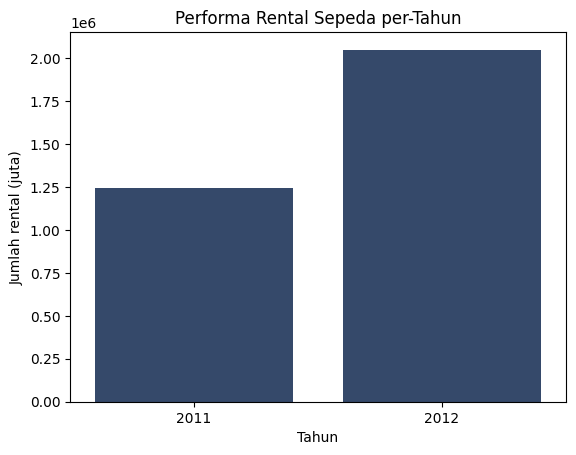

In [149]:
yearly_rental_df = day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

sns.barplot(data=yearly_rental_df, x="yr", y="cnt", color="#2c4773")
plt.title("Performa Rental Sepeda per-Tahun")
plt.xlabel("Tahun")
plt.xticks(ticks=[0, 1], labels=["2011", "2012"])
plt.ylabel("Jumlah rental (juta)")
plt.show()

**Insight:**
- Terdapat peningkatan jumlah rental sepeda yang signifikan dari tahun 2011 hingga 2012. Hal ini menunjukkan performa yang lebih baik pada tahun 2012 jika dibandingkan dengan tahun sebelumnya.

### Pertanyaan 2: Bagaimana performa rental setiap bulannya pada tahun 2011 dan 2012?

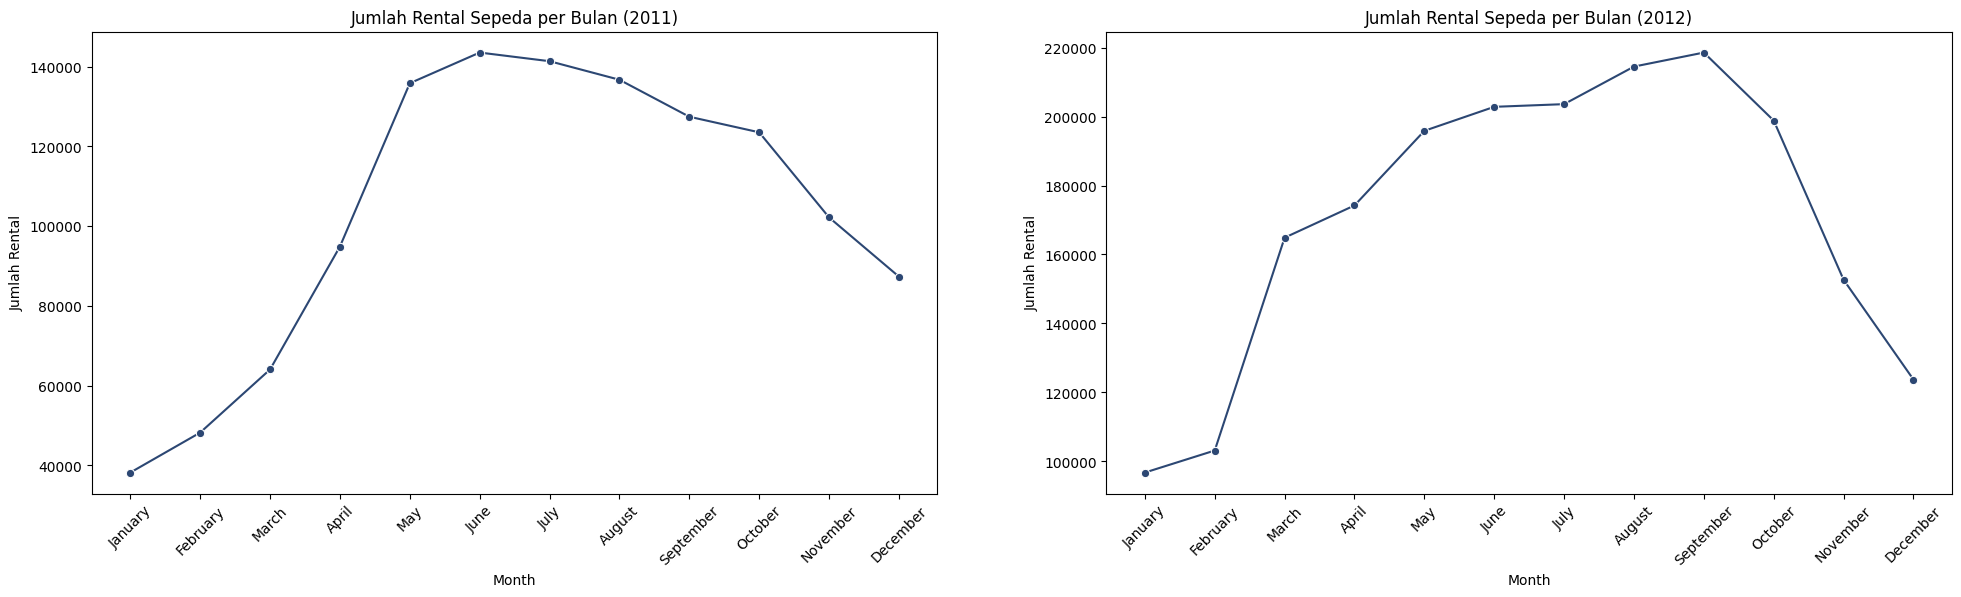

In [150]:
monthly_rental_2011_df = day_df[day_df.yr == 0].groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

monthly_rental_2012_df = day_df[day_df.yr == 1].groupby(by="mnth").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

sns.lineplot(x="mnth", y="cnt", data=monthly_rental_2011_df, ax=ax[0], marker="o", color="#2c4773")
ax[0].set_title("Jumlah Rental Sepeda per Bulan (2011)")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Jumlah Rental")
ax[0].set_xticks(ticks=monthly_rental_2011_df["mnth"], labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)

sns.lineplot(x="mnth", y="cnt", data=monthly_rental_2012_df, ax=ax[1], marker="o", color="#2c4773")
ax[1].set_title("Jumlah Rental Sepeda per Bulan (2012)")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Jumlah Rental")
ax[1].set_xticks(ticks=monthly_rental_2012_df["mnth"], labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=45)
plt.show()

**Insight:**
- Data tahun 2011 dan 2012 menunjunkkan pola yang cukup mirip; adanya peningkatan jumlah rental dari awal tahun hingga titik tertentu di pertengahan tahun, tetapi setelah itu jumlah rental sepeda konsisten mengalami penurunan hingga akhir tahun.
- Kenaikan terjadi hingga bulan June pada tahun 2011. Sedangkan pada tahun 2012 kenaikan terjadi hingga bulan September.
- Peningkatan jumlah rental sepeda yang terjadi di paruh awal menjadi kurang berarti karena penurunan signifikan yang terjadi di paruh akhir, sehingga jumlah rental sepeda di awal tahun dan akhir tahun tidak jauh berbeda, terutama pada tahun 2012 yang mengalami penurunan drastis pada bulan October - November.

### Pertanyaan 3: Bagaimana pengaruh working day dan jam terhadap rata-rata rental sepeda?

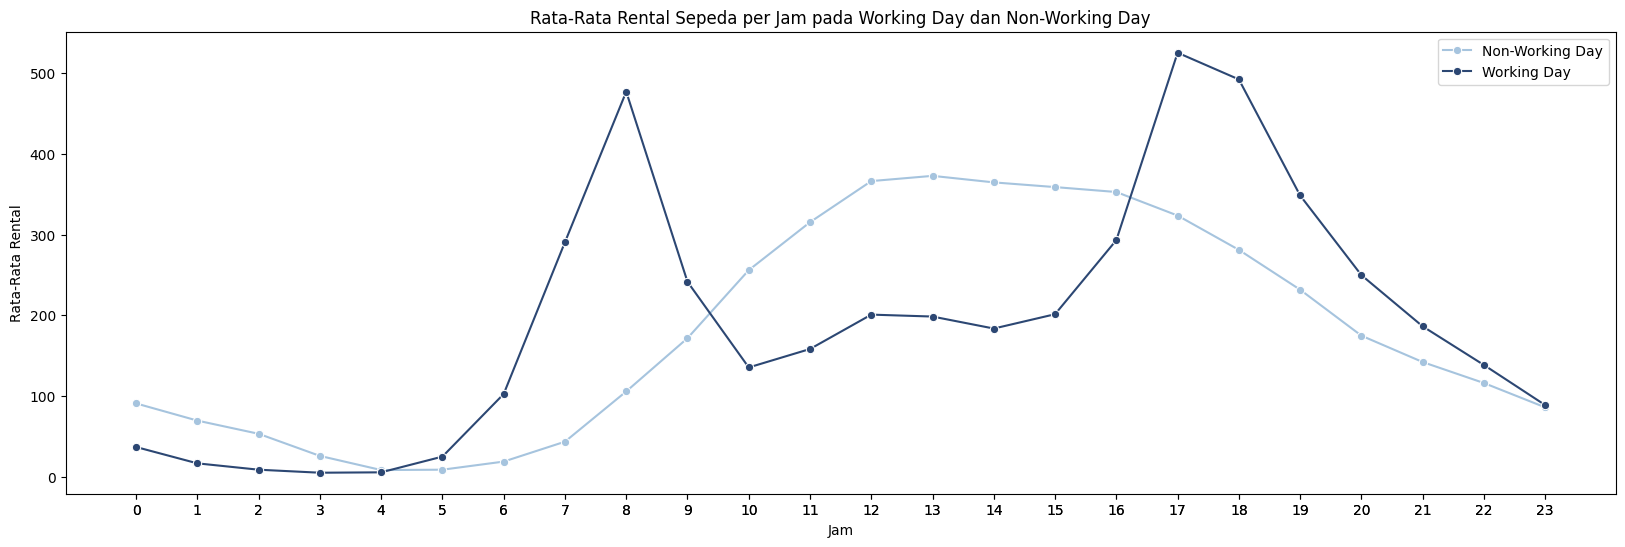

In [151]:
workingday_hourly_df = hour_df.groupby(by=["workingday", "hr"]).agg({
    "cnt": "mean"
}).reset_index()

plt.figure(figsize=(20, 6))
sns.lineplot(data=workingday_hourly_df[workingday_hourly_df.workingday == 0], x="hr", y="cnt", marker="o", label="Non-Working Day", color="#a6c4de")
sns.lineplot(data=workingday_hourly_df[workingday_hourly_df.workingday == 1], x="hr", y="cnt", marker="o", label="Working Day", color="#2c4773")
plt.title("Rata-Rata Rental Sepeda per Jam pada Working Day dan Non-Working Day")
plt.xlabel("Jam")
plt.ylabel("Rata-Rata Rental")
plt.xticks(ticks=workingday_hourly_df["hr"])
plt.show()

**Insight:**
- Rata-rata rental sepeda pada working day menunjukkan performa yang lebih baik jika dibandingkan dengan non-working day pada pagi dan sore - malam hari.
- Terjadi peningkatan signifikan pada pukul 8 pagi dan 5 sore pada saat working day.
- Rata-rata rental sepeda pada non-working day menunjukkan performa yang lebih baik jika dibandingkan dengan working day pada siang dan dini hari. Sangat berbanding terbalik jika melihat rata-rata rental pada working day saat siang hari yang menurun signifikan.

### Pertanyaan 4: Bagaimana perbandingan antara casual dan regular users dalam seluruh jumlah rental?

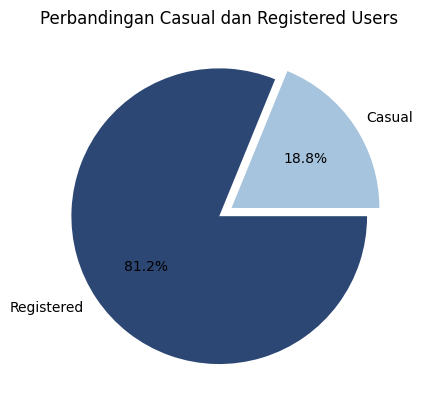

In [152]:
year = ("Casual", "Registered")
colors = ("#a6c4de", "#2c4773")

plt.title("Perbandingan Casual dan Registered Users")
plt.pie(
    x=[casual_percentage, registered_percentage],
    labels=year,
    colors=colors,
    autopct="%1.1f%%",
    explode=(0.1, 0)
)
plt.show()

**Insight:**
- Registered users jauh lebih mendominasi dibanding casual users. Namun, jumlah casual users sebesar hampir 20% sangat potensial sebagai peluang memperluas market bisnis.

## Analisis Lanjutan (Opsional)

### Clustering

Pada tahap ini, rental sepeda akan dianalisis berdasarkan musim, weekday, workingday, dan weather situation. Tahap ini bertujuan untuk mengetahui faktor-faktor apa saja yang memengaruhi tingkat performa rental sepeda serta bagaimana pengaruhnya. Hal ini diperlukan untuk menyusun strategi pengembangan bisnis ke depannya.

### Jumlah Rental Sepeda berdasarkan Musim

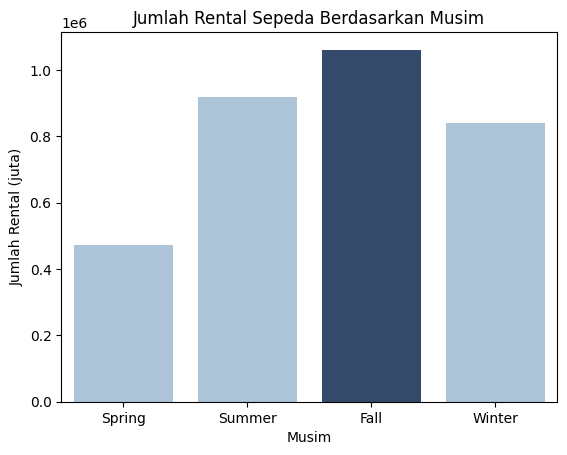

In [153]:
season_df = day_df.groupby(by="season").agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=season_df, x="season", y="cnt", hue="season", legend=False,  palette=["#a6c4de", "#a6c4de", "#2c4773", "#a6c4de"])
plt.title("Jumlah Rental Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.xticks(ticks=season_df["season"] - 1, labels=["Spring", "Summer", "Fall", "Winter"])
plt.ylabel("Jumlah Rental (juta)")
plt.show()

**Insight:**
- Jumlah rental sepeda paling tinggi terdapat pada musim fall, yakni sebesar 1061129.
- Jumlah rental sepeda paling rendah terdapat pada musim spring, yakni sebesar 471348.

### Rata-Rata Rental Sepeda Berdasarkan Weekday

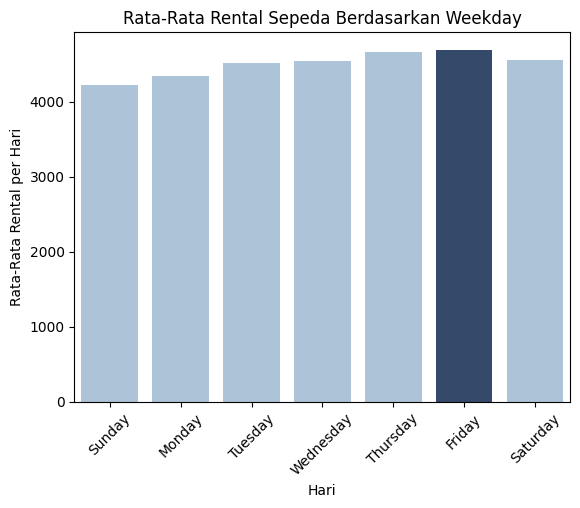

In [154]:
weekday_day_df = day_df.groupby(by="weekday").agg({
    "cnt": "mean"
}).reset_index()

sns.barplot(data=weekday_day_df, x="weekday", y="cnt", hue="weekday", legend=False, palette=["#a6c4de", "#a6c4de", "#a6c4de", "#a6c4de", "#a6c4de", "#2c4773", "#a6c4de"])
plt.title("Rata-Rata Rental Sepeda Berdasarkan Weekday")
plt.xticks(ticks=weekday_day_df["weekday"], labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=45)
plt.xlabel("Hari")
plt.ylabel("Rata-Rata Rental per Hari")
plt.show()

**Insight:**
- Rata-rata harian rental sepeda tidak memiliki perbedaan yang jauh antar setiap nama harinya.
- Rata-rata harian rental sepeda tertinggi terdapat pada hari Friday (Jumat)

### Jumlah Rental Sepeda berdasarkan Working Day

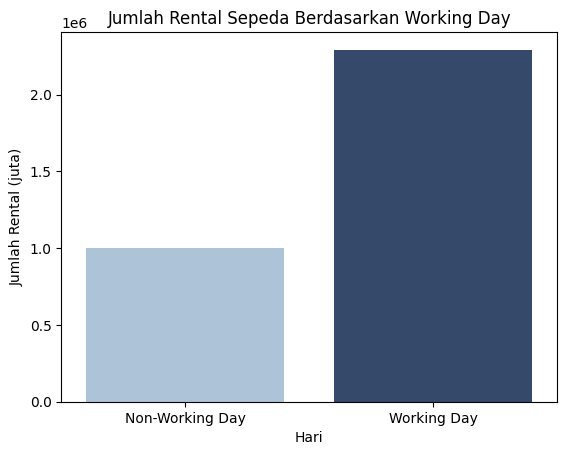

In [155]:
workingday_df = day_df.groupby(by="workingday").agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=workingday_df, x="workingday", y="cnt", hue="workingday", legend=False,  palette=["#a6c4de", "#2c4773"])
plt.title("Jumlah Rental Sepeda Berdasarkan Working Day")
plt.xlabel("Hari")
plt.xticks(ticks=workingday_df["workingday"], labels=["Non-Working Day", "Working Day"])
plt.ylabel("Jumlah Rental (juta)")
plt.show()

**Insight:**
- Jumlah rental sepeda pada saat working day jauh lebih tinggi dibanding saat non-working day. Hal ini menunjukkan performa bisnis yang lebih bagus terjadi saat working day.

### Rata-Rata Rental Sepeda per Hari Berdasarkan Weather Situation

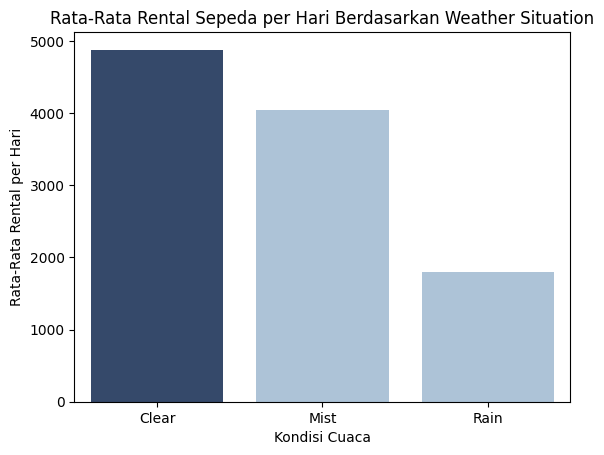

In [156]:
weather_day_df = day_df.groupby(by="weathersit").agg({
    "cnt": "mean"
}).reset_index()

sns.barplot(data=weather_day_df, x="weathersit", y="cnt", hue="weathersit", legend=False,  palette=["#2c4773", "#a6c4de", "#a6c4de"])
plt.title("Rata-Rata Rental Sepeda per Hari Berdasarkan Weather Situation")
plt.xlabel("Kondisi Cuaca")
plt.xticks(ticks=weather_day_df["weathersit"] - 1, labels=["Clear", "Mist", "Rain"])
plt.ylabel("Rata-Rata Rental per Hari")
plt.show()

**Insight:**
- Rata-rata rental sepeda paling tinggi terjadi ketika kondisi cuaca clear (cerah). Sedangkan, rata-rata rental sepeda terendah terjadi ketika kondisi cuaca rain (hujan).
- Tidak ada rental sepeda yang tercatat saat kondisi cuaca snow (bersalju).

## Conclusion

- Bagaimana perbedaan performa rental sepeda pada tahun 2011 dan 2012?
    - **Conclusion**: Performa rental sepeda mengalami peningkatan cukup signifikan pada tahun 2012. Selisih jumlah rental sepeda cukup besar, yakni 806473. Peningkatan ini menggambarkan potensi bisnis untuk semakin berkembang.

- Bagaimana performa rental sepeda setiap bulannya pada tahun 2011 dan 2012?
    - **Conclusion**: Pada tahun 2011 dan 2012, terdapat pola performa yang mirip. Performa rental sepeda mengalami peningkatan cukup signifikan pada awal tahun, tetapi kemudian mengalami penurunan cukup signifikan mulai dari pertengahan hingga akhir tahun. Hal ini menunjukkan belum ada konsistensi performa dalam bisnis. Peningkatan signifikan yang terjadi di awal tahun tidak bertahan hingga akhir tahun. Analisis terhadap faktor-faktor yang melatarbelakangi hal ini perlu dilakukan.
- Bagaimana pengaruh working day dan jam terhadap jumlah rental sepeda?
    - **Conclusion**: Working day dan non-working day masing-masing memiliki peak-hour nya sendiri dimana performa rental sepeda meningkat. Performa paling bagus saat working day terdapat saat pagi dan sore hari. Sementara itu performa paling bagus saat non-working day terjadi saat siang hari. Hal ini dapat dipengaruhi oleh perbedaan aktivitas yang dilakukan masyarakat saat working day dan non-working day. Mengetahui peak-hour ini dapat menjadi sebuah peluang untuk mengembangkan bisnis lebih lanjut.
- Bagaimana perbandingan antara casual dan regular users dalam seluruh jumlah rental?
    - **Conclusion**: Saat ini market bisnis bike sharing didominasi oleh registered users. Hal ini menunjukkan performa bisnis yang baik. Terdapat peluang untuk memperluas jangkauan bisnis dengan menggaet 18.8% casual users agar menjadi registered users. 

In [157]:
day_df.to_csv("dashboard/main_day.csv", index=False)
hour_df.to_csv("dashboard/main_hour.csv", index=False)